# **Construindo uma distribuição de frequência com base em um conjunto de dados**

O conjunto de dados a seguir lista os preços (em dólares) de 30 aparelhos
GPS (global positioning system) portáteis.
Construa uma distribuição de frequência com sete classes.

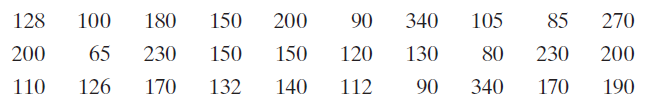

In [2]:

import pandas as pd
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])
print(data)

v_max = data.max()
v_min = data.min()
n_classes = 7

0     128
1     100
2     180
3     150
4     200
5      90
6     340
7     105
8      85
9     270
10    200
11     65
12    230
13    150
14    150
15    120
16    130
17     80
18    230
19    200
20    110
21    126
22    170
23    132
24    140
25    112
26     90
27    340
28    170
29    190
dtype: int64


# **Distribuição de Frequências**

O método value_counts registra a frequência de ocorrência dos dados em cada classe (o número de classes é dado pelo parâmetro bins). O método sort_index ordena os índices (classes) em ordem crescente.

In [5]:
dist_freq = data.value_counts(bins=n_classes).sort_index()
print(dist_freq)

(64.72399999999999, 104.286]    6
(104.286, 143.571]              9
(143.571, 182.857]              6
(182.857, 222.143]              4
(222.143, 261.429]              2
(261.429, 300.714]              1
(300.714, 340.0]                2
dtype: int64


Note que as classes da distribuição de frequências não estão definidas de forma "amigável". Vamos alterar a definição dos intervalos de classe usando o método interval_range.

In [6]:
from math import ceil
nova_dist_freq = pd.DataFrame(dist_freq)
nova_dist_freq = nova_dist_freq.reset_index()
nova_dist_freq.columns = ['Classe', 'Freq']

amplitude = ceil((v_max - v_min) / n_classes)
classes = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude)
print(classes)

nova_dist_freq['Classe'] = classes
display(nova_dist_freq)

IntervalIndex([(65, 105], (105, 145], (145, 185], (185, 225], (225, 265], (265, 305], (305, 345]], dtype='interval[int64, right]')


,Classe,Freq
0,"(65, 105]",6
1,"(105, 145]",9
2,"(145, 185]",6
3,"(185, 225]",4
4,"(225, 265]",2
5,"(265, 305]",1
6,"(305, 345]",2


# **Caracterísiticas adicionais da distribuição**

Vamos adicionar as colunas que exibam os pontos médios, a frequência relativa e a frequência acumnulada de cada classe.

In [7]:
pts_medios = [classe.mid for classe in classes]
print(pts_medios)
# Inserção da coluna de pontos medios
nova_dist_freq['Pontos medios'] = pts_medios
# Cálculo e inserção das colunas de frequencia relativa e acumulada
observcoes = len(data)
nova_dist_freq['Freq relativa'] = nova_dist_freq['Freq']/observcoes
nova_dist_freq['Freq acumulada'] = nova_dist_freq['Freq'].cumsum()
nova_dist_freq['Freq acum rel'] = nova_dist_freq['Freq acumulada']/observcoes

display(nova_dist_freq)

[85.0, 125.0, 165.0, 205.0, 245.0, 285.0, 325.0]


,Classe,Freq,Pontos medios,Freq relativa,Freq acumulada,Freq acum rel
0,"(65, 105]",6,85.0,0.200000,6,0.200000
1,"(105, 145]",9,125.0,0.300000,15,0.500000
2,"(145, 185]",6,165.0,0.200000,21,0.700000
3,"(185, 225]",4,205.0,0.133333,25,0.833333
4,"(225, 265]",2,245.0,0.066667,27,0.900000
5,"(265, 305]",1,285.0,0.033333,28,0.933333
6,"(305, 345]",2,325.0,0.066667,30,1.000000


# **Construção do histograma de frequências**

O histograma é construído usando o método hist do Pandas. Diversas características do histograma, tais como as classes (parâmetro bins), cor das barras e marcações nos eixos vertical e horizontal são programáveis. Também é inserida a frequência observada no topo de cada barra.

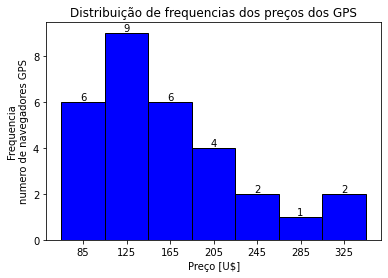

In [8]:
# Construção de histogramas
histograma = data.hist(bins=[classe.left for classe in classes] +
                       [nova_dist_freq['Classe'][n_classes - 1].right],
                       color = 'blue', edgecolor = 'black', grid = False)
# Inserção de atributos ao grafico
histograma.set(xlabel = 'Preço [U$]',
               ylabel = 'Frequencia\nnumero de navegadores GPS',
               title = 'Distribuição de frequencias dos preços dos GPS',
               xticks = nova_dist_freq['Pontos medios'])
# Opcional - Inserçção de rotulos nas barras do histograma
barras = histograma.patches
freqs = nova_dist_freq['Freq']
for barra, freq in zip(barras, freqs):
  altura = barra.get_height()
  histograma.text(barra.get_x() + barra.get_width() / 2, altura,
                  freq, ha = 'center', va = 'bottom')


# **Construção do polígono de frequências**

Para construir o polígono de frequências, vamos empregar a biblioteca matplotlib.

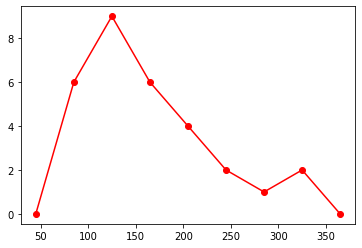

In [9]:
import matplotlib.pyplot as plt

fic_left = [pts_medios[0] - amplitude]
fic_right = [pts_medios[-1] + amplitude]

x_data = fic_left + pts_medios + fic_right

y_data = [0] + list(nova_dist_freq['Freq']) + [0]

plt.plot(x_data, y_data, 'ro-')